# **Bank Fraud Detection**

**Problem Statement:**

In the evolving landscape of financial transactions, banks face an increasing threat of fraudulent activities that jeopardize the security of customer assets and undermine the integrity of the financial system. The goal of this project is to develop a robust and efficient system for detecting bank fraud, utilizing advanced analytics and machine learning techniques.

**Objective:**

The primary objective of this project is to create a predictive model capable of identifying potentially fraudulent transactions within a bank's financial dataset. The system should enhance the bank's ability to detect and prevent fraudulent activities, thereby minimizing financial losses and preserving customer trust


**Data Collection:**

BankSim is an agent-based simulator of bank payments obtained from Kaggle.
The data set has no personal information or disclosure of legal and private customer transactions.  The data contains records of transactional data covering six months, from November 2012 until April 2013.

**Acknowledgements**

This research was conducted during my PhD studies in Sweden at Blekinge Institute of Technology (BTH ww.bth.se). More about it: http://edgarlopez.net

**Original paper**

Please refer to this dataset using the following citations:

Lopez-Rojas, Edgar Alonso ; Axelsson, Stefan
Banksim: A bank payments simulator for fraud detection research Inproceedings
26th European Modeling and Simulation Symposium, EMSS 2014, Bordeaux, France, pp. 144–152, Dime University of Genoa, 2014, ISBN: 9788897999324.
https://www.researchgate.net/publication/265736405_BankSim_A_Bank_Payment_Simulation_for_Fraud_Detection_Research


## **Data Variable/Feautures:**

There is no null/missing values  found in the dataset

**Step:** this represents the day when the transaction happened. There is a total of  179 steps, so the data runs for approx six months. There is no specific pattern determined with respect to target variable, so we will drop it.

**Customer:** this represents the unique ID of the person who initialized the transaction. There is a total of 4,112 unique customers available in the dataset.

**Age:** this variable is split in age intervals, starting from 0 to 6 and the letter U which stands for Unknown. The coding for the numbers is:

0: less than 18 years old

1: between 19 and 25 years old

2: between 26 and 35 years old

3: between 36 and 45 years old

4: between 46 and 55 years old

5: between 56 and 65 years old

6: older than 65 years old

**Gender:** this variable is coded as F for Female, M for Male, E for Enterprise and U for Unknown.

**Merchant:** this represents the unique ID of the merchant where the actualy transaction was done. There is a total of 50 unique merchants in the dataset.

**Category:**  this represent the type of merchant where the transaction was done. There are 15 unique categories that label the general type of the transaction, we will not show all of them here.

**Amount:**  this respresent the amount of a transaction in an instance. There are only 52 values equal to zero and no negative values. The maximum amount is 8329.

**Fraud:**  this feature represents 0 for non-fraudulant data and 1 for fraudulant data

**zipcodeOri and zipMerchant** :  Both of these features will be removed as both contains a unique value of 28007.

## **Data Understanding**

**Import the requied Libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BankData.csv')

Get the top 2 rows

In [ ]:
df.head(2)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0


Information of dataset (i.e. data types or if have null values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


Checking if any missing data

In [ ]:
df.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

There is no missing/null value present in the dataset

Summary of statistics for numeric columns

In [ ]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


Checking the number of rows and columns

In [ ]:
print("Number of rows :" , df.shape[0])
print("Number of columns :" , df.shape[1])

Number of rows : 594643
Number of columns : 10


*Removing commas and spaces from the object column to understand the columns better*


Getting columns name

In [ ]:
comma_cols = []
for col in df.columns:
   if df[col].dtype == 'object':
        if df[col].str.contains("'").any():
            comma_cols.append(col)

Removing es_ from category for better understanding

In [ ]:
for col in comma_cols:
  df[col] = df[col].str.replace("'", "").str.replace("" "", "").str.strip()

In [ ]:
df['category'] = df['category'].str.replace("es_", "")

In [ ]:
for col in df.columns:
  print("Number of unique values in ",col ," :- ", len(df[col].unique()))

Number of unique values in  step  :-  180
Number of unique values in  customer  :-  4112
Number of unique values in  age  :-  8
Number of unique values in  gender  :-  4
Number of unique values in  zipcodeOri  :-  1
Number of unique values in  merchant  :-  50
Number of unique values in  zipMerchant  :-  1
Number of unique values in  category  :-  15
Number of unique values in  amount  :-  23767
Number of unique values in  fraud  :-  2


From above we can drop the zipcodeOri and zipMerchant as it has only 1 unique value which 28007

In [ ]:
df = df.drop(['zipcodeOri','zipMerchant'], axis =1)

Handling any duplicates, if present droping duplicates

In [ ]:
df.duplicated().any()

False

# **Exploratary Data Analysis**

Checking the target variable instances

In [ ]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

Checking the target variable distribution

fraud
0    98.789189
1     1.210811
Name: fraud, dtype: float64


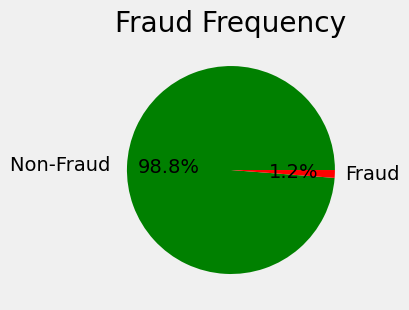

In [ ]:
print(df.groupby('fraud')['fraud'].count()/df['fraud'].count()*100)
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(df.groupby('fraud')['fraud'].count()/df['fraud'].count()*100, autopct='%1.1f%%', labels=['Non-Fraud ','Fraud'], colors= ['green', 'red'])
ax.set_title("Fraud Frequency")
plt.tight_layout()

From above we can see,  the target variable distribution is higher on non-fraud data, it means that the majority of instances in the dataset are labeled as non-fraudulent, while the occurrences of fraud are relatively rare. This imbalance in the distribution of the target variable can have significant implications for machine learning models and data analysis.

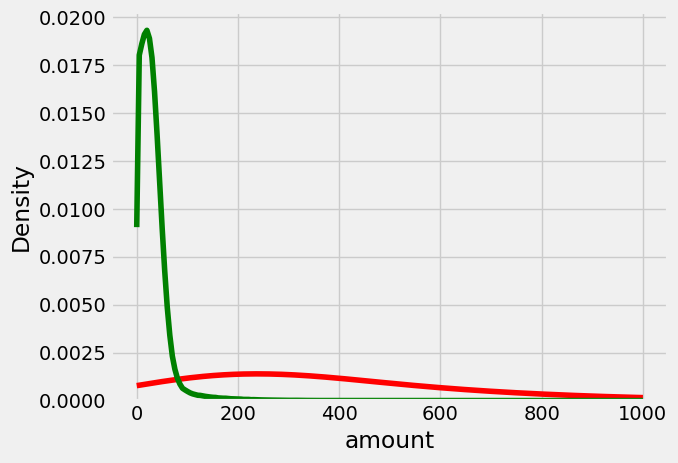

In [ ]:
sns.kdeplot(df[df['fraud']==1]['amount'], color ='red', clip = (0,1000))
sns.kdeplot(df[df['fraud']==0]['amount'], color ='green',clip = (0,1000))
plt.show()

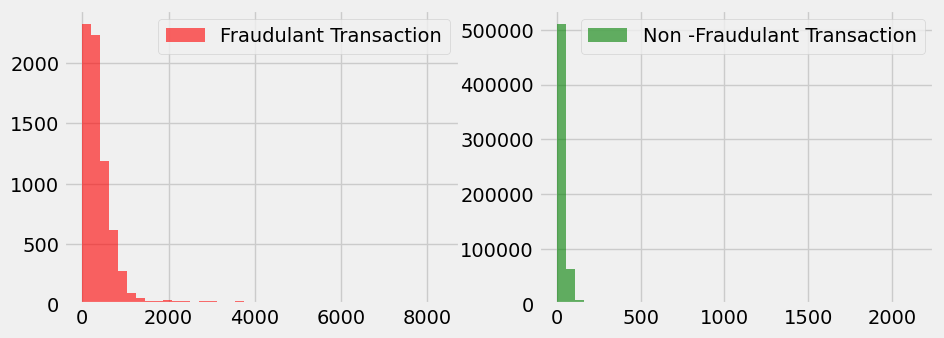

In [ ]:
plt.figure(figsize=(10, 8))
#Ploting histogram to  amount with Fraud transactions
plt.subplot(2, 2, 1)
(df[df.fraud == 1].amount.hist(bins=40, color='red', alpha=0.6, label="Fraudulant Transaction"))
plt.legend()
#Ploting histogram to  amount with Non-Fraud transactions
plt.subplot(2, 2, 2)
df[df.fraud == 0].amount.hist(bins=40, color='green', alpha=0.6, label="Non -Fraudulant Transaction")
plt.legend()

From the above figure it looks the amount distribution of the fraud transactions is skewed to the right in the dataset. This represents the amount of fraud trasactions is higher, while the number of instance is higher as well

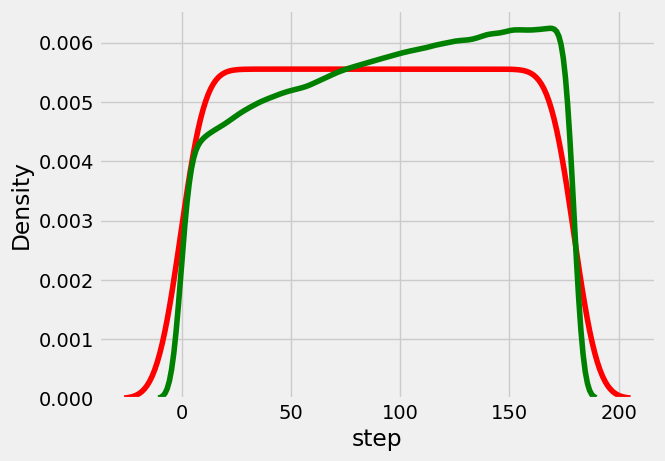

In [ ]:
sns.kdeplot(df[df['fraud']==1]['step'], color ='red')
sns.kdeplot(df[df['fraud']==0]['step'], color ='green')
plt.show()

Trying to understand if there is any relation of genders throughout the dataset with fraud transactions

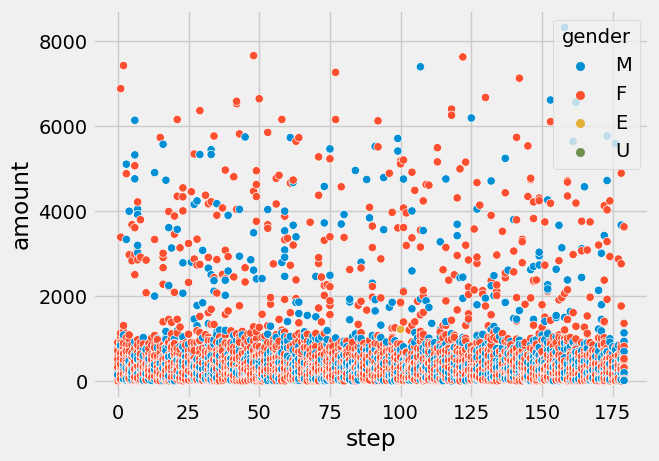

In [ ]:
sns.scatterplot(y = df[df['fraud'] == 1]['amount'], x = df['step'], hue=df['gender'])
plt.show()

From the above visuals, step variable does not have any specific pattern for fraud and non fraud transactions. So we can drop the variable before models

In [ ]:
merchants_step=pd.concat((df[df.fraud == 1].groupby('merchant')['step'].count(),
          df[df.fraud == 0 ].groupby('merchant')['step'].count()),
          keys=["Fraud","Non-Fraud","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Fraud'])
merchants_step.reset_index(inplace = True)
merchants_step.head()

,merchant,Fraud,Non-Fraud
0,M348875670,10.0,97
1,M933210764,12.0,57
2,M692898500,16.0,884
3,M495352832,24.0,45
4,M2080407379,36.0,12


While checking the above data merchants M980657600 and  M480139044 has 1472.0 and 1634.0	occurances respectively in a span of 6 months, while most of the merchants has below 500.

In [ ]:
merchant_id = ['M480139044', 'M980657600']
filtered_df = df[df['merchant'].isin(merchant_id)]
filtered_df['category'].unique()

array(['health', 'sportsandtoys'], dtype=object)

In [ ]:
mcerchants_amount = pd.concat((df[df.fraud == 1].groupby('merchant')['amount'].sum(),
          df[df.fraud == 0 ].groupby('merchant')['amount'].sum()),
          keys=["Fraud","Non-Fraud","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Fraud'])
mcerchants_amount.reset_index(inplace = True)
mcerchants_amount.head()


,merchant,Fraud,Non-Fraud
0,M348875670,2114.85,10804.38
1,M933210764,3869.57,4794.97
2,M692898500,6688.63,92951.57
3,M1748431652,7413.41,13554.72
4,M78078399,11040.48,90384.51


In [ ]:
merchant_id = ['M732195782', 'M480139044', 'M980657600', 'M2080407379']
filtered_df = df[df['merchant'].isin(merchant_id)]
filtered_df['category'].unique()

array(['health', 'sportsandtoys', 'travel'], dtype=object)

M480139044, M980657600 merchants contribute to higher number of fraud cases falls under sportsandtoys and health category, resulting in high risk merchants. M732195782 and M2080407379 belongs to Travel category has less cases but fraud amount is higher than the other merchants.

Creating a dataframe with fraud and non-fraud  data with category feature

In [ ]:
category_data = pd.concat((df[df.fraud == 1].groupby('category')['amount'].mean(), \
          df[df.fraud == 0].groupby('category')['amount'].mean(), \
          df.groupby('category')['fraud'].mean()*100),
          keys=["Fraud","Non-Fraud","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Fraud'])
category_data.reset_index(inplace=True)
category_data.sort_values('Fraud', ascending = False)

,category,Fraud,Non-Fraud,Percent(%)
11,travel,2660.802872,669.025533,79.395604
10,home,457.484834,113.338409,15.206445
9,hotelservices,421.823339,106.548545,31.422018
8,tech,415.274114,99.924638,6.666667
7,health,407.031338,103.737228,10.512614
6,sportsandtoys,345.366811,88.502738,49.525237
5,otherservices,316.469605,75.685497,25.000000
4,leisure,300.286878,73.230400,94.989980
3,fashion,247.008190,62.347674,1.797335
2,wellnessandbeauty,229.422535,57.320219,4.759380


From above we  can be seen that leisure, travel, sports and toys have more than half of the Fraud transactions, whereas transportation, food and contents have 100% clean cases

Creating a dataframe with fraud and non-fraud  data with Gender feature

In [ ]:
Gender_data = pd.concat((df[df.fraud == 1].groupby('gender')['amount'].mean(), \
          df[df.fraud == 0].groupby('gender')['amount'].mean(), \
          df.groupby('gender')['fraud'].mean()*100),
          keys=["Fraud","Non-Fraud","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Fraud'])
Gender_data.reset_index(inplace=True)
Gender_data.sort_values(('Fraud'), ascending = False)

,gender,Fraud,Non-Fraud,Percent(%)
2,M,540.370078,31.692975,0.907279
1,F,526.178188,31.968111,1.465962
0,E,473.458571,34.016336,0.594228
3,U,NaN,31.508932,0.000000


As seen from the above there is no fraud transaction for unkown gender and moreover it contributes to nearly zero in the whole dataset. We can consider removing the data from the gender unkown

Creating a dataframe with fraud and non-fraud  data with Age feature

In [ ]:
Age_data = pd.concat((df[df.fraud == 1].groupby('age')['amount'].mean(), \
          df[df.fraud == 0].groupby('age')['amount'].mean(), \
          df.groupby('age')['fraud'].mean()*100),
          keys=["Fraud","Non-Fraud","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Fraud'])
Age_data.reset_index(inplace=True)
Age_data.sort_values(('Fraud'), ascending = False)

,age,Fraud,Non-Fraud,Percent(%)
7,0,657.278125,34.409713,1.957586
6,2,552.212432,31.846593,1.251401
5,6,545.402682,31.859470,0.974826
4,3,532.428758,31.909451,1.192815
3,4,522.400915,31.857414,1.293281
2,1,499.757692,31.986634,1.185254
1,5,489.418017,31.410537,1.095112
0,U,473.458571,34.016336,0.594228


Creating bins for amount as add additional column for better understanding

In [ ]:
threshold = [
    (df['amount'] <= 500),
    (df['amount'] > 500) & (df['amount'] <= 1000),
    (df['amount'] > 1000) & (df['amount'] <= 1500),
    (df['amount'] > 1500) & (df['amount'] <= 2000),
    (df['amount'] > 2000) & (df['amount'] <= 2500),
    (df['amount'] > 2500) & (df['amount'] <= 3000),
    (df['amount'] > 3000) & (df['amount'] <= 3500),
    (df['amount'] > 3500)
]
Values = (
    '0-500',
    '500-1000',
    '1000-1500',
    '1500-2000',
    '2000-2500',
    '2500-3000',
    '3000-3500',
    '>3500'
)

df['threshold'] =  np.select(threshold, Values, default='Unknown')
df.head(2)

,step,customer,age,gender,merchant,category,amount,fraud,threshold
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,0-500
1,0,C352968107,2,M,M348934600,transportation,39.68,0,0-500


Ploting the distribution of each categorical varible with overall instances

<Figure size 1000x500 with 0 Axes>

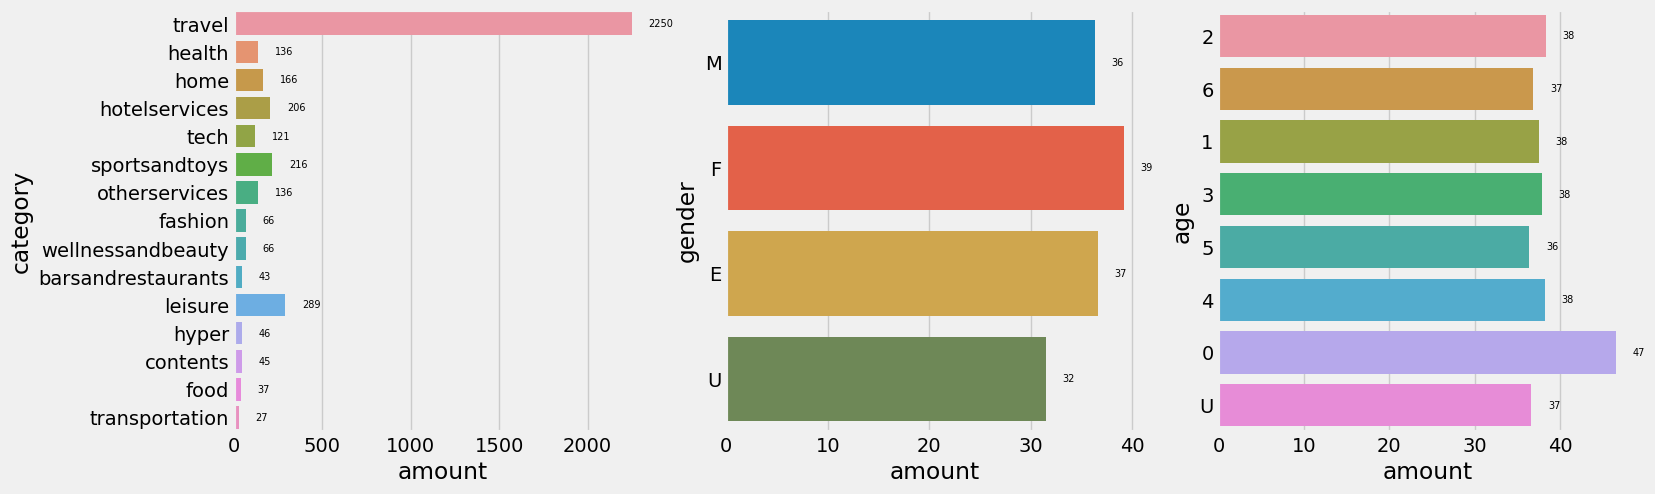

In [ ]:
plt.figure(figsize=(10,5))
fig, axs = plt.subplots(ncols = 3, figsize=(15,5))
def show_axes(ax):
  for i  in ax.containers:
    ax.bar_label(i, fmt = '%.f' , label_type='edge', fontsize = 7 , padding=12)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout(pad = 1.2 , rect = (0,1,1,2))
sns.barplot(data= df.sort_values('amount', ascending= False),  x = "amount" , y =  "category", ax = axs[0], errorbar=None)
show_axes(axs[0])
sns.barplot (data= df.sort_values('amount', ascending= False) , x = "amount" , y =  "gender", ax = axs[1], errorbar=None)
show_axes(axs[1])
sns.barplot (data= df.sort_values('amount', ascending= False), x = "amount" , y =  "age", ax = axs[2], errorbar=None )
show_axes(axs[2])


Ploting the distribution of each categorical varible with fraud instances

<Figure size 1000x500 with 0 Axes>

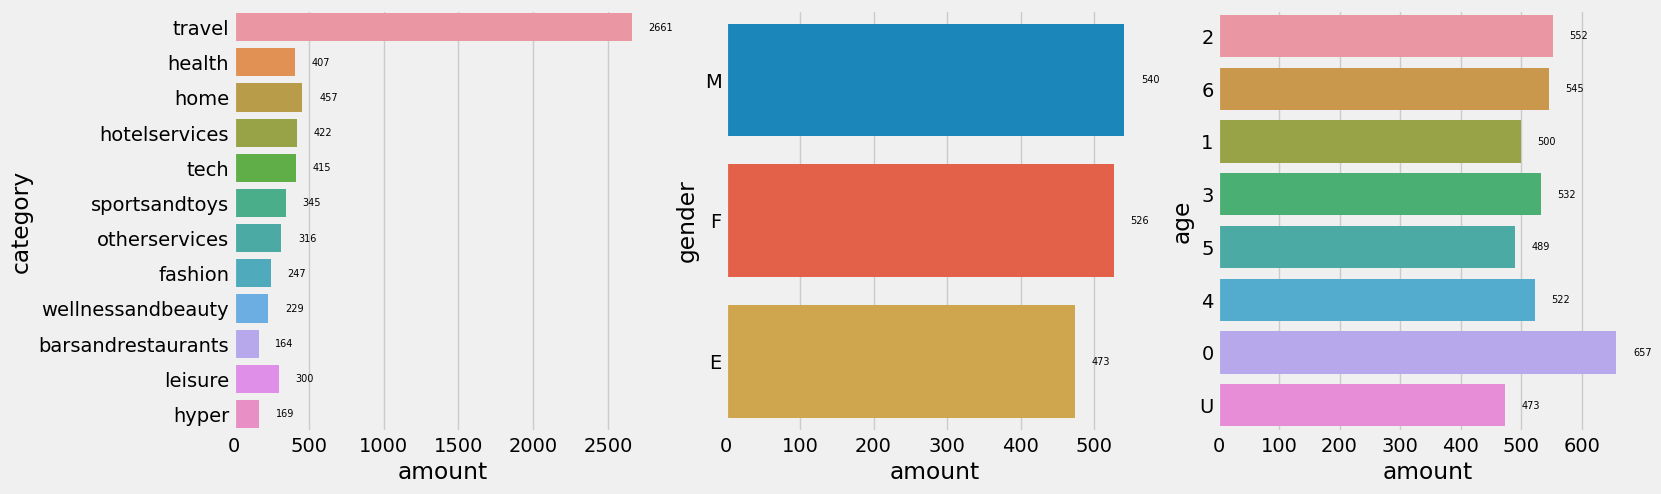

In [ ]:
fraud_data = df[df['fraud'] == 1]
plt.figure(figsize=(10,5))

fig, axs = plt.subplots(ncols = 3, figsize=(15,5))
def show_axes(ax):
  for i  in ax.containers:
    ax.bar_label(i, fmt = '%.f' , label_type='edge', fontsize = 7 , padding=12)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout(pad = 1.2 , rect = (0,1,1,2))

sns.barplot(data= fraud_data.sort_values('amount', ascending= False),  x = "amount" , y =  "category", ax = axs[0], errorbar=None)
show_axes(axs[0])
sns.barplot (data= fraud_data.sort_values('amount', ascending= False) , x = "amount" , y =  "gender", ax = axs[1], errorbar=None)
show_axes(axs[1])
sns.barplot (data= fraud_data.sort_values('amount', ascending= False), x = "amount" , y =  "age", ax = axs[2], errorbar=None )
show_axes(axs[2])


Average expense for travel is higher on the Fraud transactions

<Axes: xlabel='category', ylabel='threshold'>

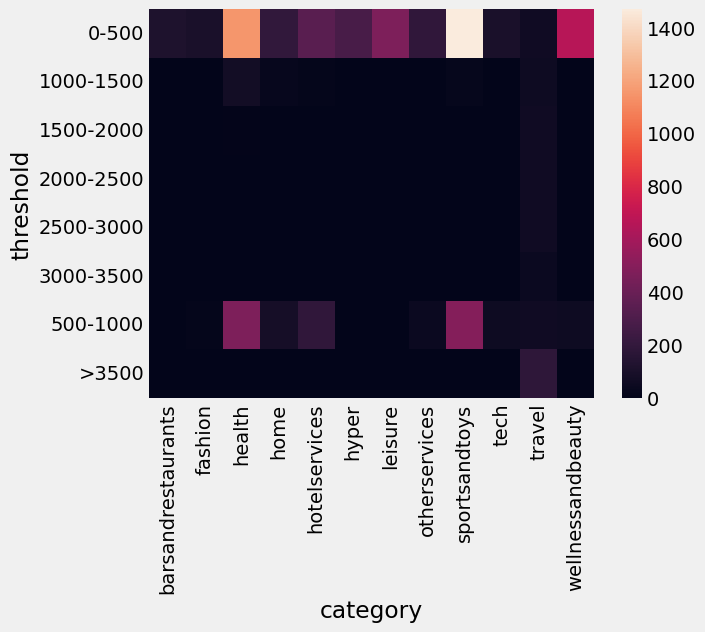

In [ ]:
sns.heatmap(pd.crosstab(df['threshold'], df[df['fraud']==1]['category']))

From this we can analyze, health and sports and toys category has higher number of fraud case with amount ranging from 0-1000 and both category shows similar pattern wherase Travel has amount more than 3500 have less than 600 fraud cases.

In the conculsion, we  need to address the biasness of the data which might affect our machine learning models due to imbalanced data and outliers.
Strategies we can implement:
1. Resampling Technique -  We can perform oversampling technique on minority class (fraud cases) or undersampling technique on majority class (non-fraud cases), SMOTE and  ADAYSN as well
2. Correct Algorithmic selection - Some algorithms like Random Forests, Garient Boosting and SVM may handle the imbalanced dataset more efficiently than the simple machine learning algorithms like Logitics Regression.
3. Performance Mertics - We can use metrics like precision, recall, F1-score and AUC-ROC which was provide the different evalution of the model's performance.
4. We can apply data transformations, such as logarithmic or square root transformations, to make the distribution more symmetrical and reduce the impact of extreme values.
